<a href="https://colab.research.google.com/github/eccardoso/mvp-analise-de-dados-e-boas-praticas/blob/main/MVP_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas
**Edson da Costa Cardoso**

### **MVP**

O que não está detalhado ou pode ser melhorado neste notebook para ficar como esperamos para o MVP:

Blocos de texto que expliquem textualmente cada etapa e cada decisão do seu código, contando uma história completa e compreensível, do início ao fim;
Boas práticas de codificação;
Após cada gráfico, escrever 1 parágrafo resumindo os principais achados, analisando os resultados e levantando eventuais pontos de atenção.

### **1. Definição do Problema**

O dataset usado neste projeto será a base de Dados de Violência no Estado do Rio de Janeiro no período de Jan/2014 a Fev/2021 por município e um subconjunto dos tipos de crimes praticados. O objetivo é compreender a criminalidade no estado do Rio mostrando os municípios considerados mais violentos e os menos violentos e quais os tipos de crimes mais presentes neste período.

O dataset contém as seguintes variáveis categóricas:

•	fmun_cod – código dos municípios do estado do Rio de Janeiro

•	fmun - nome dos 91 municípios do estado do Rio de Janeiro

•	ano – 2014 a 2021

•	mês - 1 a 12

•	região – Baixada Fluminense, Capital, Grande Niterói e Interior   

O dataset contém as seguintes variáveis numéricas que representam o número dos seguintes crimes:  
             
•	hom_doloso

•	lesao_corp_morte    

•	latrocinio     

•	hom_por_interv_policial

•	estupro

•	roubos

•	furtos  

•	sequestro_relampago     

•	estelionato

•	trafico_drogas        

São 7.912 observações e 15 variáveis

Para mais detalhes sobre este dataset, consulte: https://www.ispdados.rj.gov.br/

In [12]:
# Importar bibliotecas para a programação
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

Para carregar o arquivo .csv sem cabeçalho disponível com às informações, foi utilizado o pacote Pandas (Python Data Analysis Library).

Com o dataset carregado, iremos explorá-lo um pouco.

In [13]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/eccardoso/mvp-analise-de-dados-e-boas-praticas/main/BaseMunicipioMensalv3.csv"

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url,  delimiter=';')

Com a função dataset.head() é posssível mostrar na tela as primeiras linhas do dataset o que permite fazer a verificação se os dados foram carregados corretamente.

In [14]:
dataset.head()

,fmun_cod,fmun,ano,mes,regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
0,3300100,Angra dos Reis,2014,1,Interior,11,0,0,1,7,23,134,0,21,12
1,3300159,Aperibé,2014,1,Interior,0,0,0,0,0,0,0,0,0,0
2,3300209,Araruama,2014,1,Interior,2,0,0,0,7,23,105,0,18,4
3,3300225,Areal,2014,1,Interior,0,0,0,0,0,0,0,0,0,0
4,3300233,Armação dos Búzios,2014,1,Interior,2,0,0,0,6,12,117,0,4,10


# **3. Análise de Dados**

**3.1. Estatísticas Descritivas**


Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [22]:
# Mostra as dimensões do dataset
print(dataset.shape)

(7912, 15)


o comando print mostra que o dataset tem 7.912 linhas e 15 colunas onde nas linhas tem-se as informações dos municipios, ano, mês e nas colunas as variáveis mencionadas na definição do problema, mostradas pelo comando print(dataset.info()) a seguir. Observa-se que as variáveis fmun_cod, ano e mês apesar de serem variáveis qualitativas foram lidas como quantitativas pois eram representadas por números como por exemplo ano de 2014. Isto requer uma ação de recodificação destas varíaveis para análises adequadas com o tipo de variável.

In [16]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7912 entries, 0 to 7911
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   fmun_cod                 7912 non-null   int64 
 1   fmun                     7912 non-null   object
 2   ano                      7912 non-null   int64 
 3   mes                      7912 non-null   int64 
 4   regiao                   7912 non-null   object
 5   hom_doloso               7912 non-null   int64 
 6   lesao_corp_morte         7912 non-null   int64 
 7   latrocinio               7912 non-null   int64 
 8   hom_por_interv_policial  7912 non-null   int64 
 9   estupro                  7912 non-null   int64 
 10  roubos                   7912 non-null   int64 
 11  furtos                   7912 non-null   int64 
 12  sequestro_relampago      7912 non-null   int64 
 13  estelionato              7912 non-null   int64 
 14  trafico_drogas           7912 non-null  

Com o comando dataset.head(10) temos a visualização das dez primeiras linhas do dataset onde é possível perceber a forma com que os dados estão disponíveis.

In [17]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,fmun_cod,fmun,ano,mes,regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
0,3300100,Angra dos Reis,2014,1,Interior,11,0,0,1,7,23,134,0,21,12
1,3300159,Aperibé,2014,1,Interior,0,0,0,0,0,0,0,0,0,0
2,3300209,Araruama,2014,1,Interior,2,0,0,0,7,23,105,0,18,4
3,3300225,Areal,2014,1,Interior,0,0,0,0,0,0,0,0,0,0
4,3300233,Armação dos Búzios,2014,1,Interior,2,0,0,0,6,12,117,0,4,10
5,3300258,Arraial do Cabo,2014,1,Interior,0,0,0,0,2,6,49,0,8,10
6,3300308,Barra do Piraí,2014,1,Interior,1,0,0,0,5,7,38,0,4,5
7,3300407,Barra Mansa,2014,1,Interior,5,0,0,0,4,18,122,0,5,10
8,3300456,Belford Roxo,2014,1,Baixada Fluminense,29,0,0,0,11,307,170,0,29,29
9,3300506,Bom Jardim,2014,1,Interior,0,0,0,0,1,2,9,0,3,2


Nesta etapa as variáveis qualitativas que foram lidas como quantitativas serão convertidas na sua extensão correta pra que possamos fazer as análises seguintes. Sem esta conversão no resumo estatístico teriamos calculo de medidas descritivas (média, desvio padrão e outras) de variáveis qualitativas o que não teria o menor sentido.

In [23]:
# Convertendo variaveis não relevantes para o resumo estatítico

dataset["fmun_cod"] = dataset["fmun_cod"].astype(str)
dataset["ano"] = dataset["ano"].astype(str)
dataset["mes"] = dataset["mes"].astype(str)

O comando dataset.tail() mostra a visualização das ultimas linhas bastando colocar entre parênteses a quantidade de linhas que se queira.

In [24]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,fmun_cod,fmun,ano,mes,regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
7902,3305604,Silva Jardim,2021,2,Interior,0,0,0,0,0,2,11,0,0,0
7903,3305703,Sumidouro,2021,2,Interior,0,0,0,0,1,0,0,0,1,3
7904,3305752,Tanguá,2021,2,Interior,0,0,0,0,1,6,12,0,2,1
7905,3305802,Teresópolis,2021,2,Interior,1,0,0,0,5,5,37,0,35,24
7906,3305901,Trajano de Moraes,2021,2,Interior,0,0,0,0,0,0,0,0,0,0
7907,3306008,Três Rios,2021,2,Interior,0,0,0,0,2,11,33,0,17,32
7908,3306107,Valença,2021,2,Interior,0,0,0,0,0,2,18,0,8,7
7909,3306156,Varre-Sai,2021,2,Interior,0,0,0,0,0,0,3,0,1,0
7910,3306206,Vassouras,2021,2,Interior,1,0,0,1,1,1,4,0,9,6
7911,3306305,Volta Redonda,2021,2,Interior,4,0,0,1,6,56,119,0,100,22


Foi utilizado o comando dataset.dtypes para confirmar a natureza das variáveis do dataset para prosseguimento da análise. Nota-se que as variáveis fmun_cod, ano e mês agora estão codificadas corretamente.

In [25]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

fmun_cod                   object
fmun                       object
ano                        object
mes                        object
regiao                     object
hom_doloso                  int64
lesao_corp_morte            int64
latrocinio                  int64
hom_por_interv_policial     int64
estupro                     int64
roubos                      int64
furtos                      int64
sequestro_relampago         int64
estelionato                 int64
trafico_drogas              int64
dtype: object

Com o comando dataset.describe() temos uma tabela com as medidas descritivas das variáveis numéricas do dataset.

Interpretando a tabela vemos que Roubos e furtos são os dois crimes com maior número de ocorrências no estado do Rio de Janeiro considerando o período analisado, obtendo uma média de 167,0 e 139,6, respectivamente. Isto é percebido também quando analisamos o máximo e o terceiro quartil dos tipos de crimes. Ambos os crimes possuem uma dispersão grande com desvio padrão em torno de 800 necessitando de uma análise da distribuição dos dados. Estelionato tem uma quantidade de ocorrência intermediária considerando os demais crimes com uma média de 34. Os demais crimes apresentam valores baixos de ocorrência sendo lesão corporal por morte o menos frequente com uma média de 0,04. Pelas mediads descritas é importante analisar as distribuições para uma melhor visualização dos diversos tipos de crimes.

In [32]:
dataset.describe(percentiles=[.05,.25,.75,.95,.99])

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
count,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000
mean,4.124747,0.038675,0.147118,1.032609,4.626896,167.048534,139.586830,0.102503,34.016431,11.150910
std,12.285731,0.256914,0.718919,4.872507,14.830456,884.592601,785.963201,0.764352,193.680621,26.287785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,19.000000,0.000000,3.000000,4.000000
75%,3.000000,0.000000,0.000000,0.000000,4.000000,30.000000,70.250000,0.000000,15.000000,12.000000
95%,19.000000,0.000000,1.000000,5.000000,16.000000,684.700000,330.000000,0.000000,96.000000,39.000000
99%,75.780000,1.000000,3.000000,21.000000,105.890000,5154.680000,5412.930000,3.000000,1491.750000,129.000000


### 3.2. Visualizações Unimodais

Pelos histogramas percebe-se distribuições bastante assimétricas com alta concentração em valores baixos de ocorrência e poucos valores altos de ocorrência indicando que nenhuma das distribuições são aproximadamente normais. Isto pode ser verificado também no boxplot que apresenta uma série de outliers. Isto se deve ao fato de estar sendo analisado conjuntamente municípios menores e menos violentos com municípios maiores e mais violentos e também alguns anos.
Ressalta-se que neste dataset temos o número de ocorrências por mês e ano nos municipios e não as taxas. Pouca conclusão temos com o dado agregado até aqui.
Uma análise por grupo se faz necessária para maior compreensão dos dados deste dataset.

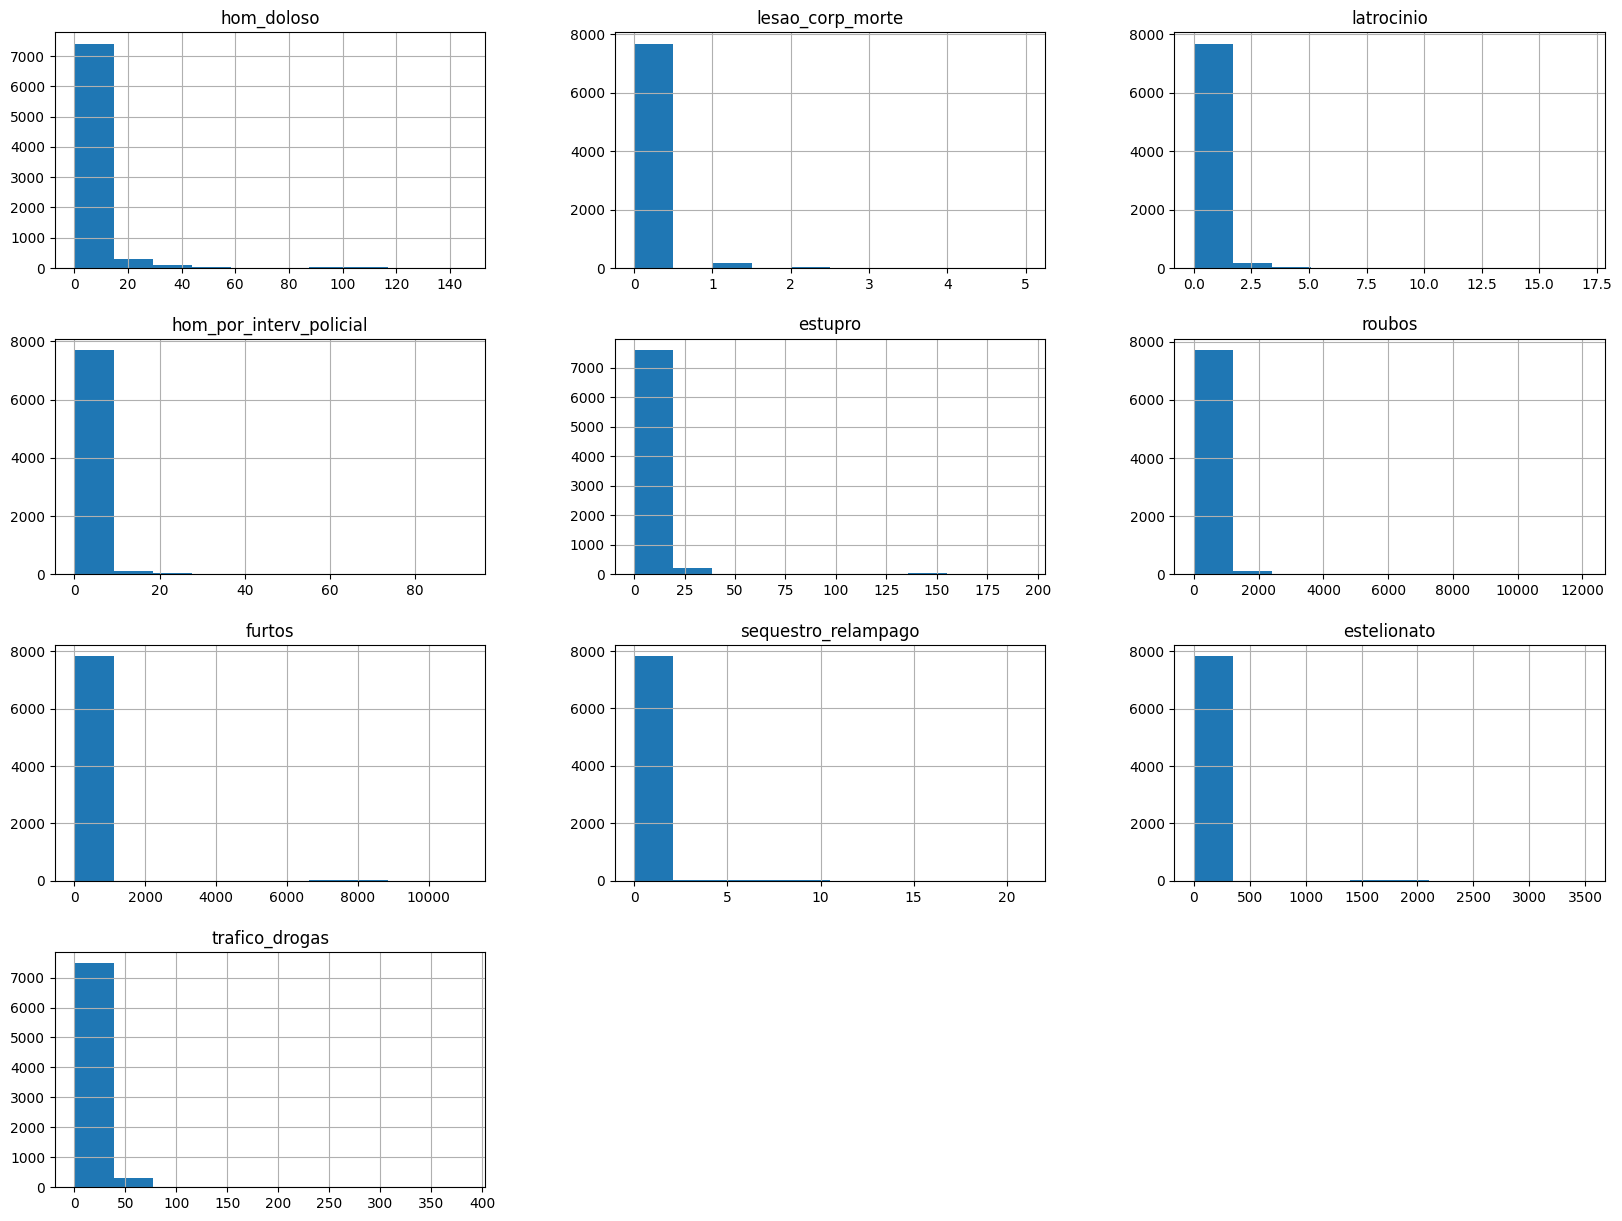

In [60]:
# Descartando colunas não numericas

datasetclone=dataset.iloc[:,5:]
datasetclone.hist(figsize = (20,15))
plt.show()



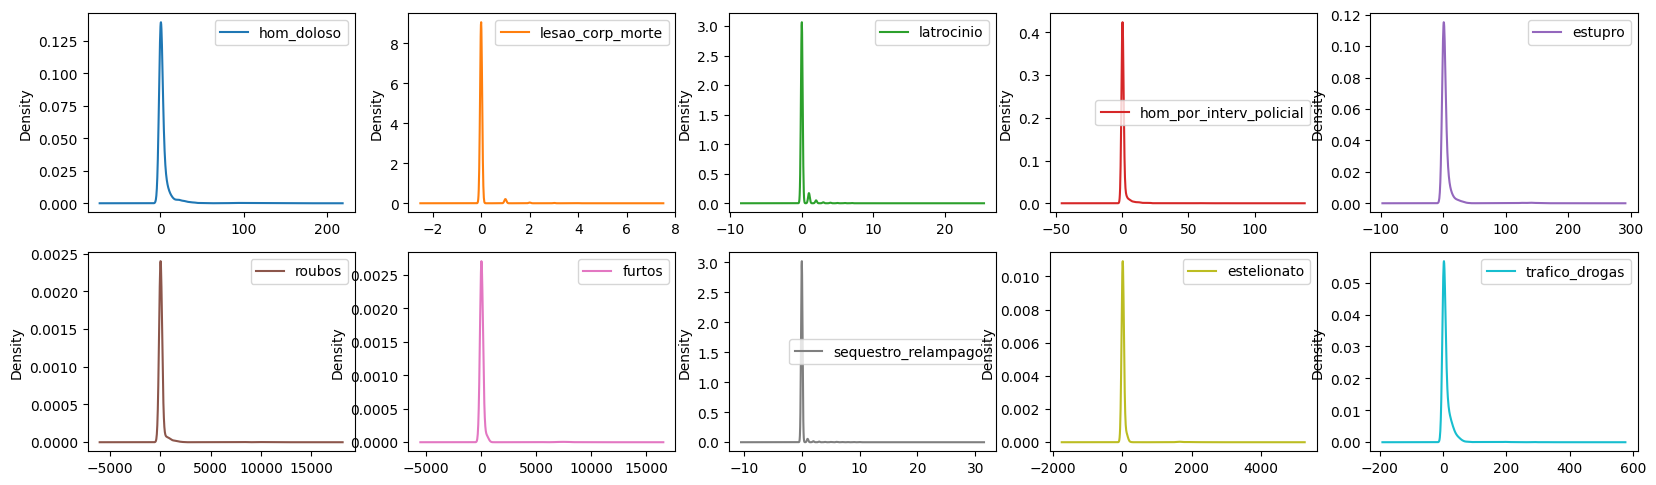

In [57]:
# Density Plot
datasetclone.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, figsize = (20,15))
plt.show()

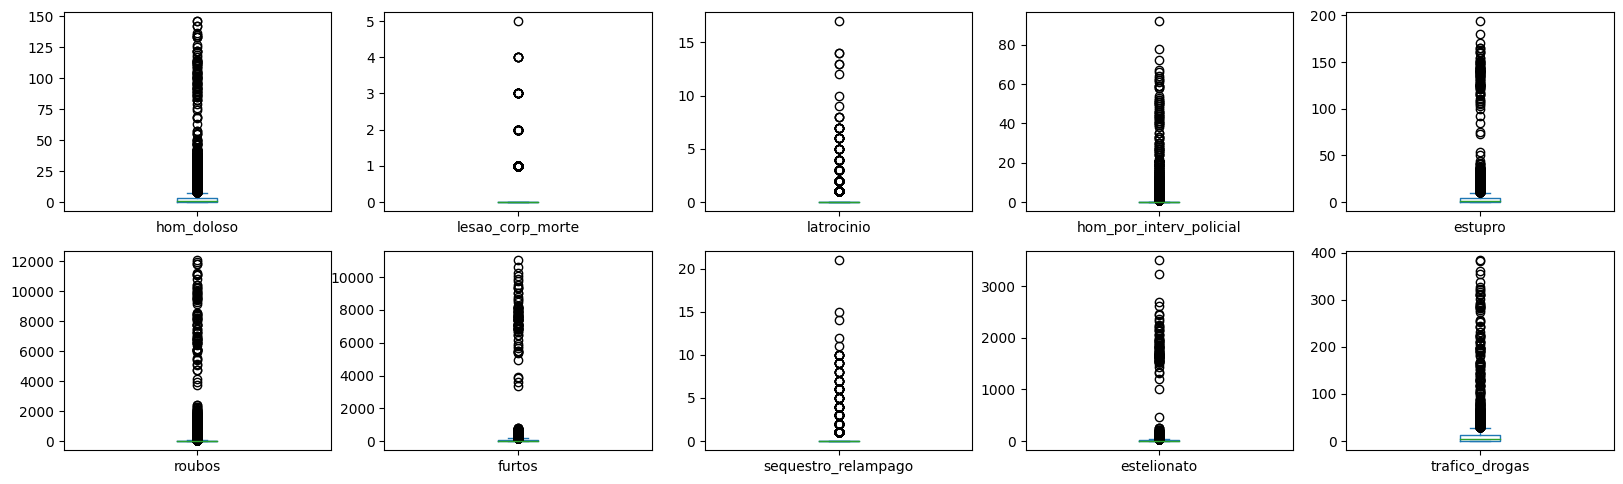

In [58]:
# Boxplot
datasetclone.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))
plt.show()

# 3.3 - Análise por grupo região

## Análise por Capital

In [62]:
agrupamento_regiao = dataset.groupby('regiao')
agrupamento_capital=agrupamento_regiao.get_group('Capital')
agrupamento_capital.describe(percentiles=[.05,.25,.75,.95,.99])

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,102.965116,1.569767,4.813953,38.813953,134.732558,8021.139535,7425.127907,6.023256,1817.558140,218.127907
std,19.219749,1.251265,3.330824,17.439314,19.588967,2016.804433,1455.221097,3.426460,404.406714,70.573582
min,57.000000,0.000000,0.000000,2.000000,75.000000,3747.000000,3380.000000,1.000000,470.000000,116.000000
5%,70.250000,0.000000,1.000000,13.500000,103.500000,4834.500000,5035.750000,2.000000,1356.000000,128.000000
25%,91.000000,1.000000,2.250000,24.000000,124.000000,6560.250000,6865.500000,4.000000,1626.250000,159.500000
50%,101.500000,1.000000,4.000000,40.000000,137.000000,7848.500000,7505.000000,6.000000,1719.000000,200.500000
75%,113.750000,2.000000,6.000000,50.750000,145.000000,9664.250000,8109.000000,8.000000,1946.500000,283.000000
95%,135.750000,4.000000,12.750000,65.500000,164.500000,11181.000000,9859.500000,10.750000,2446.250000,335.250000
99%,146.000000,4.150000,14.450000,80.100000,182.100000,11992.650000,10695.650000,15.900000,3267.400000,382.300000


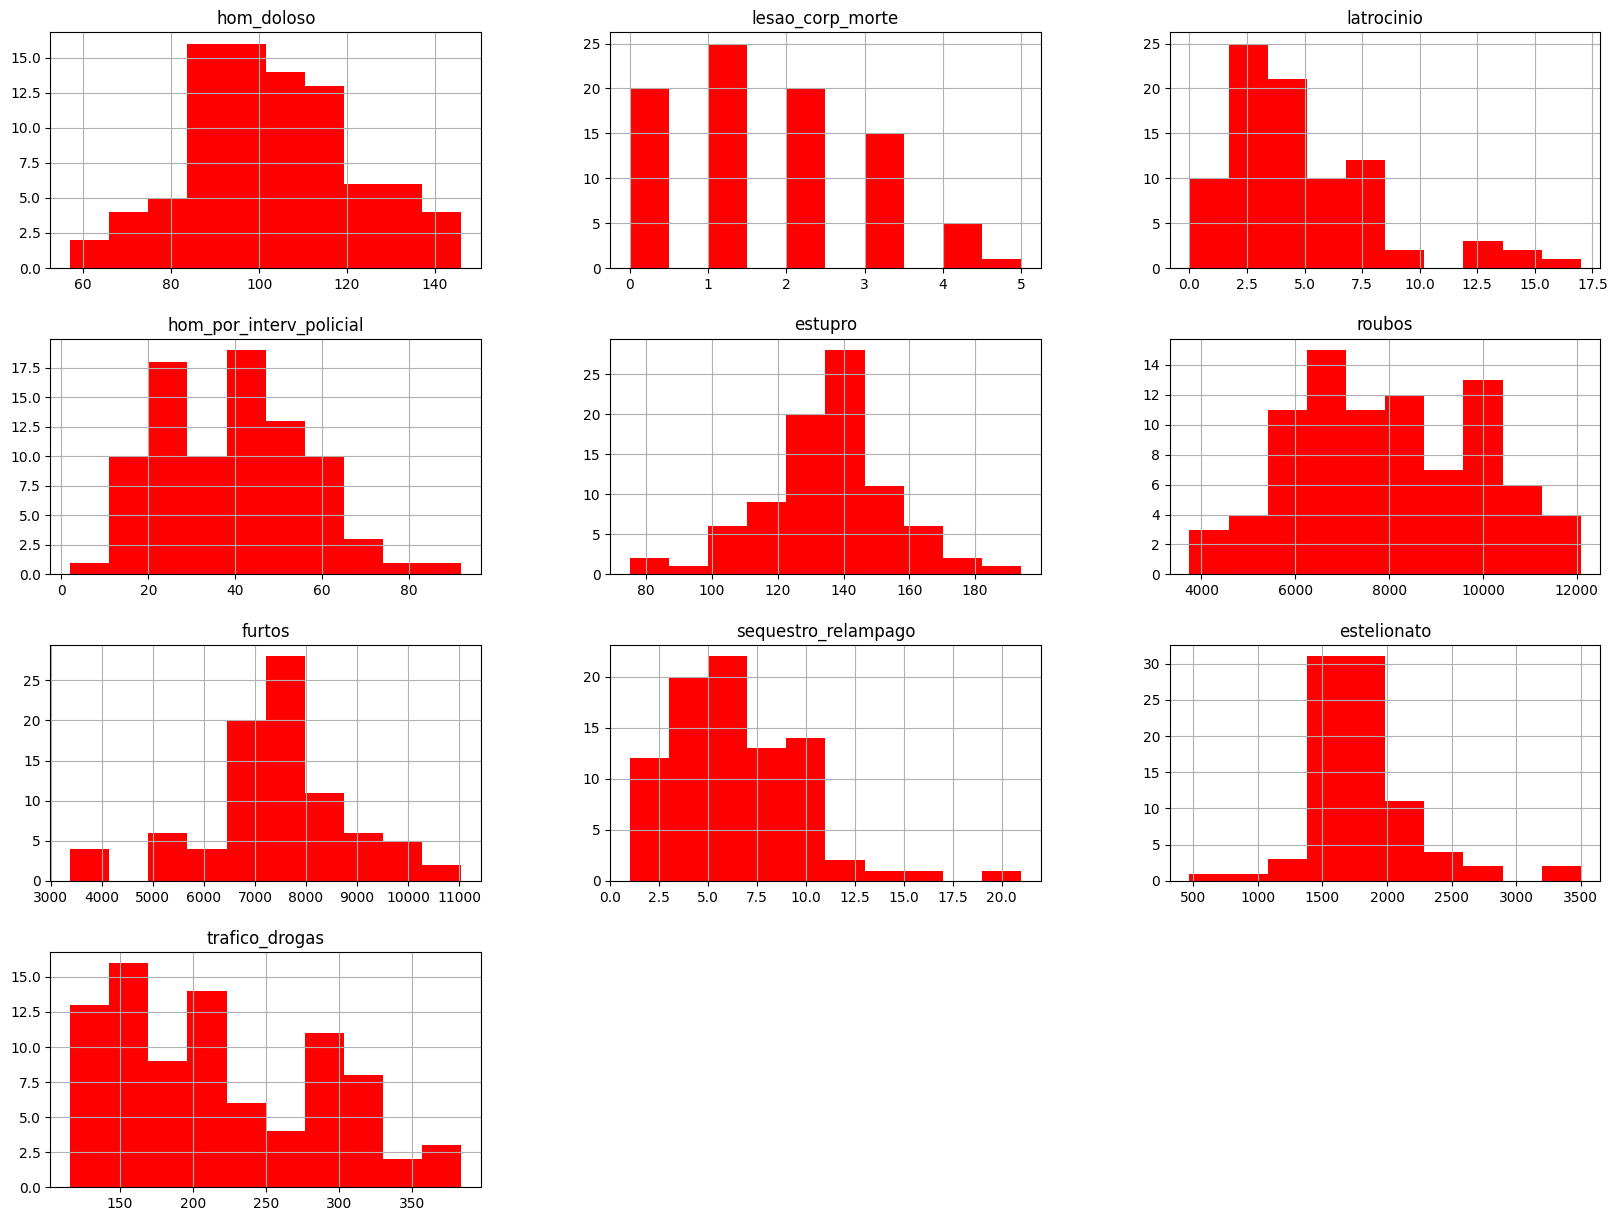

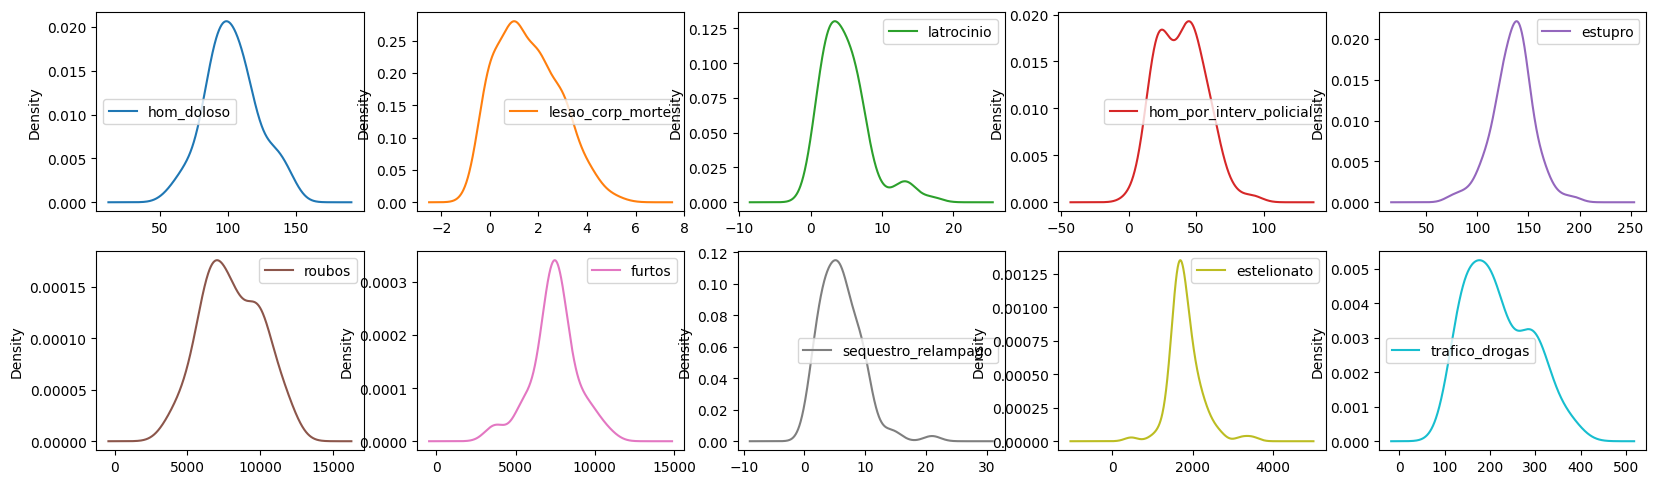

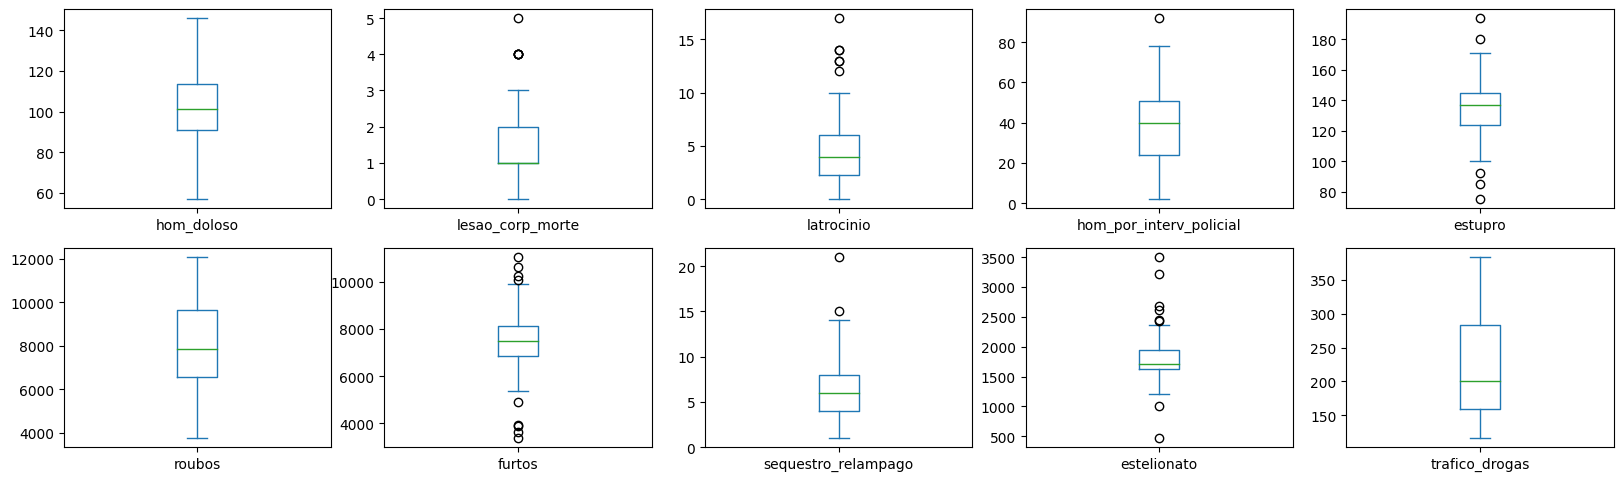

In [65]:
#g11clone=agrupamento_capital.iloc[:,5:]
#g11clone.head(10)
agrupamento_capital.hist(figsize = (20,15),color="red")
agrupamento_capital.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, figsize = (20,15))
agrupamento_capital.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))

plt.show()


#g11.hist(figsize = (20,15),color="red")

## Analise por Interior

In [68]:
agrupamento_interior=agrupamento_regiao.get_group('Interior')
agrupamento_interior.describe(percentiles=[.05,.25,.75,.95,.99])

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
count,6450.000000,6450.000000,6450.000000,6450.000000,6450.000000,6450.000000,6450.000000,6450.000000,6450.000000,6450.000000
mean,1.466822,0.012248,0.033953,0.136589,1.862016,13.931163,33.617829,0.011318,7.570078,7.184651
std,3.060191,0.112784,0.202926,0.648563,3.036022,35.867041,51.011115,0.135368,13.377291,10.754128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,13.000000,0.000000,2.000000,3.000000
75%,2.000000,0.000000,0.000000,0.000000,2.000000,10.000000,36.000000,0.000000,7.000000,9.000000
95%,7.000000,0.000000,0.000000,1.000000,8.000000,76.000000,145.000000,0.000000,37.000000,30.000000
99%,15.000000,1.000000,1.000000,3.000000,13.000000,188.000000,255.000000,0.000000,65.000000,50.000000


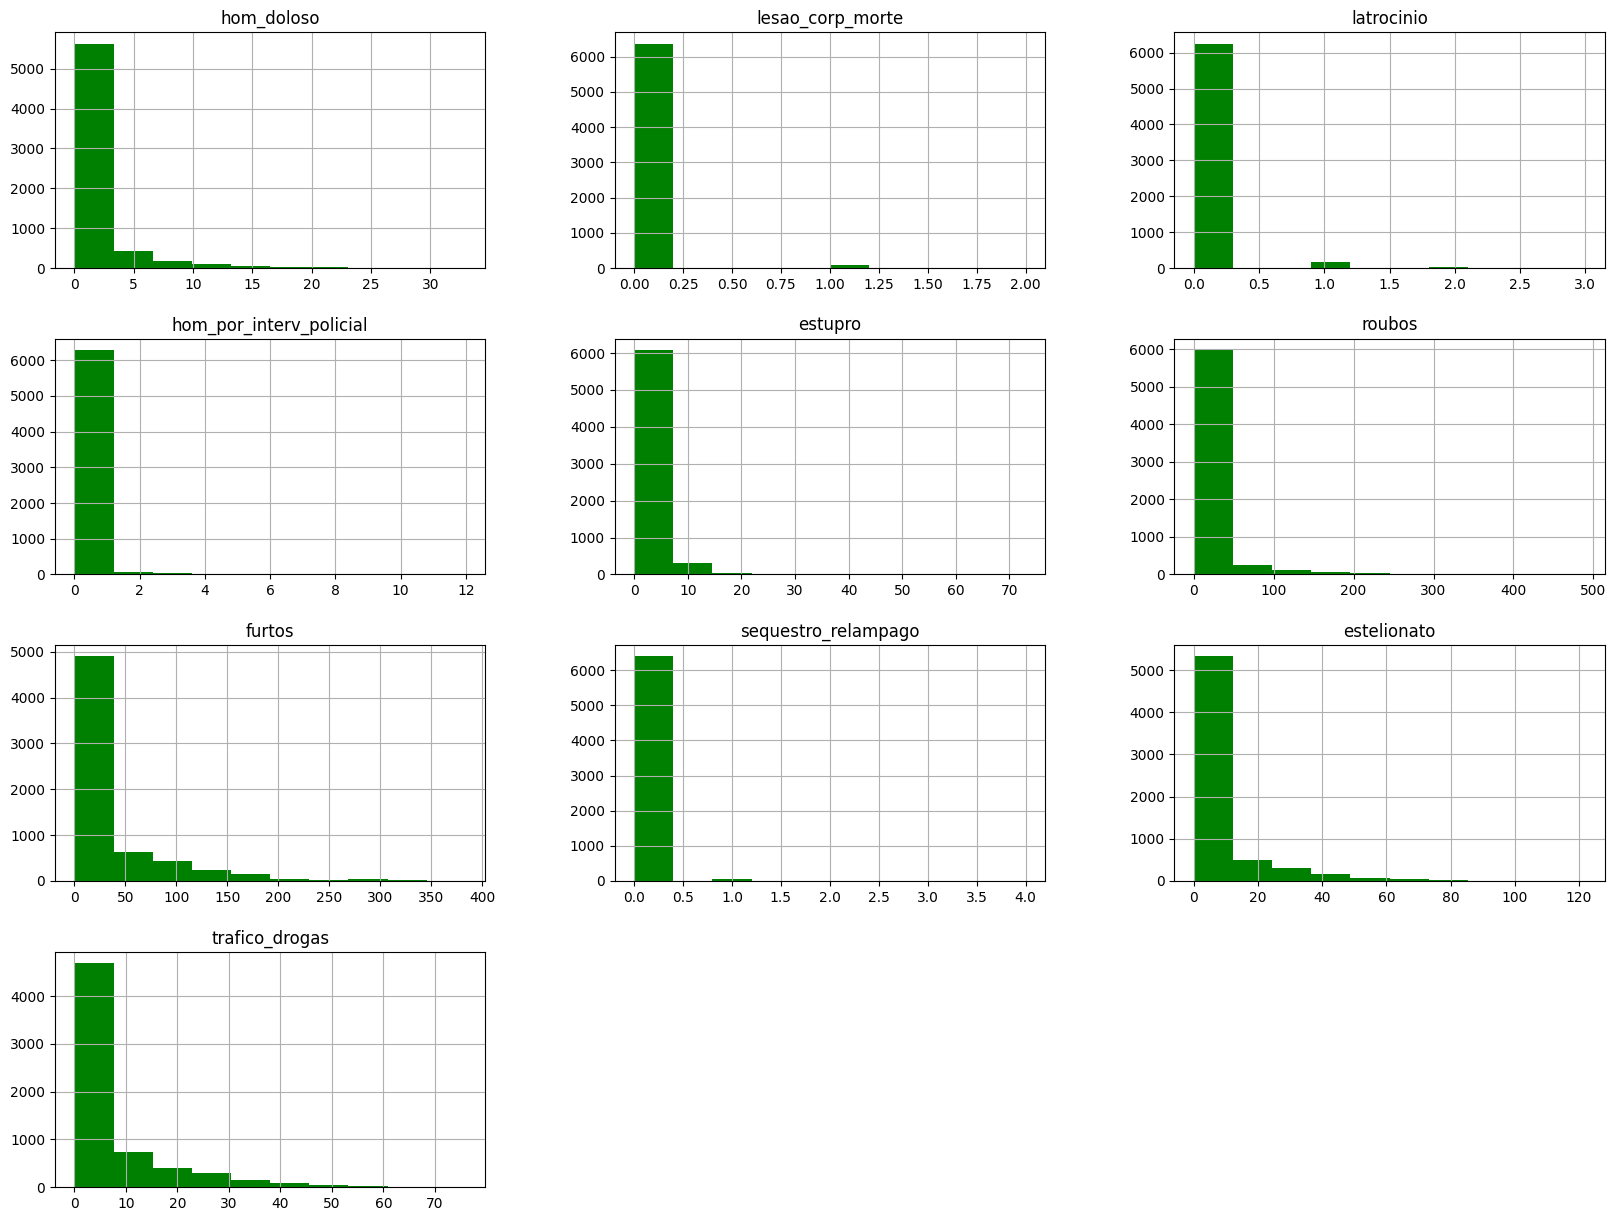

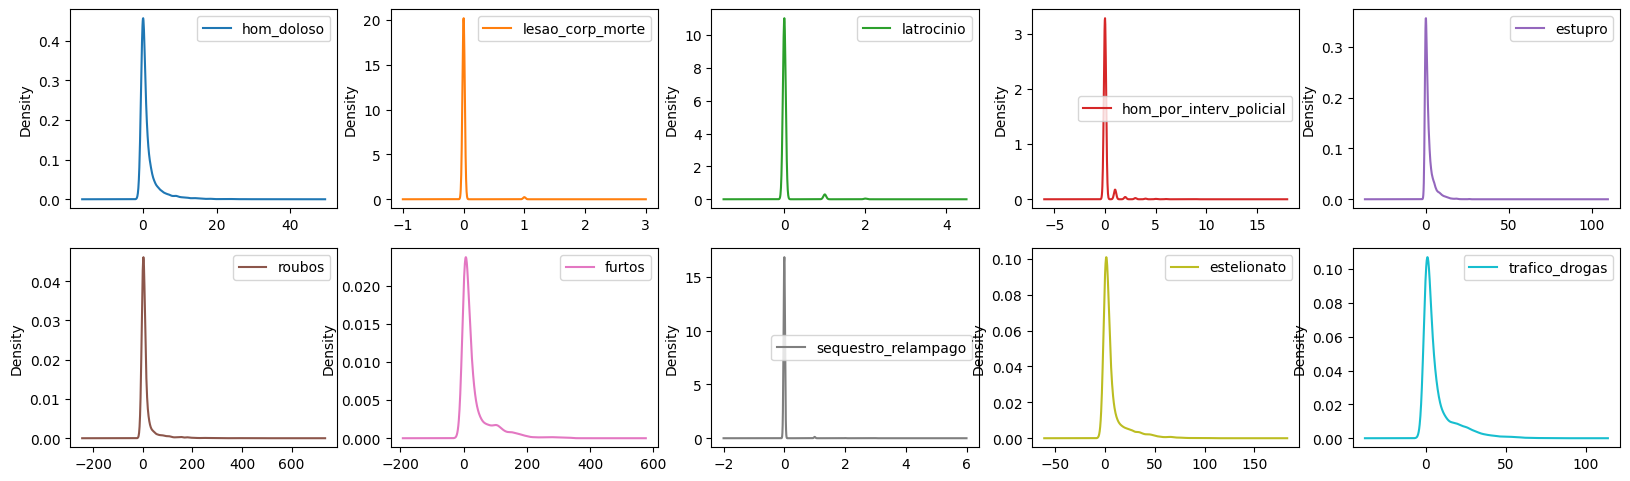

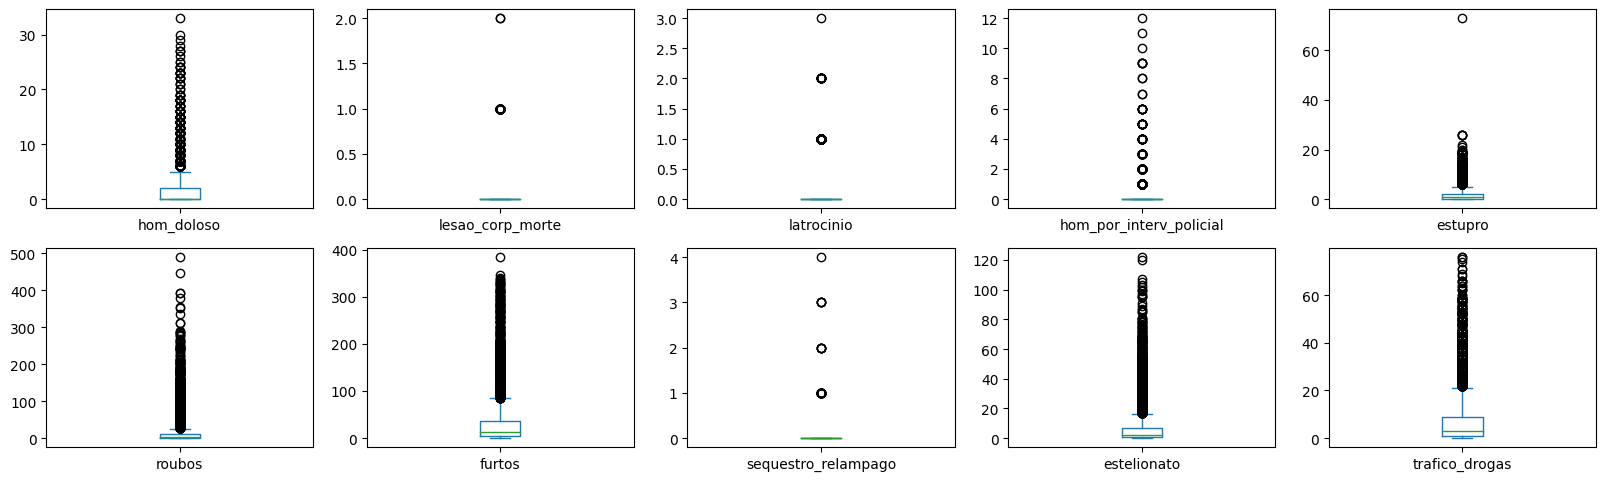

In [70]:
#g12clone=g11.iloc[:,4:]
#g12clone.head(10)
agrupamento_interior.hist(figsize = (20,15),color="green")
agrupamento_interior.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))
agrupamento_interior.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))

plt.show()

## Análise por Baixada Fluminense

In [72]:
agrupamento_baixada=agrupamento_regiao.get_group('Baixada Fluminense')
agrupamento_baixada.describe(percentiles=[.05,.25,.75,.95,.99])

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,9.852415,0.059034,0.322898,2.228086,8.721825,324.670841,134.264758,0.110912,36.093023,12.979428
std,10.743725,0.254069,0.696862,3.410033,9.021137,394.466112,151.091124,0.446058,41.984483,12.949891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,15.000000,0.000000,3.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,2.000000,47.000000,32.000000,0.000000,8.000000,4.000000
50%,6.000000,0.000000,0.000000,1.000000,5.000000,138.000000,85.000000,0.000000,20.000000,8.000000
75%,13.000000,0.000000,0.000000,3.000000,12.000000,503.500000,150.000000,0.000000,41.750000,17.000000
95%,33.150000,1.000000,2.000000,10.000000,29.000000,1185.300000,491.300000,1.000000,129.150000,44.000000
99%,47.000000,1.000000,3.000000,15.000000,36.830000,1538.000000,643.000000,2.000000,160.000000,53.000000


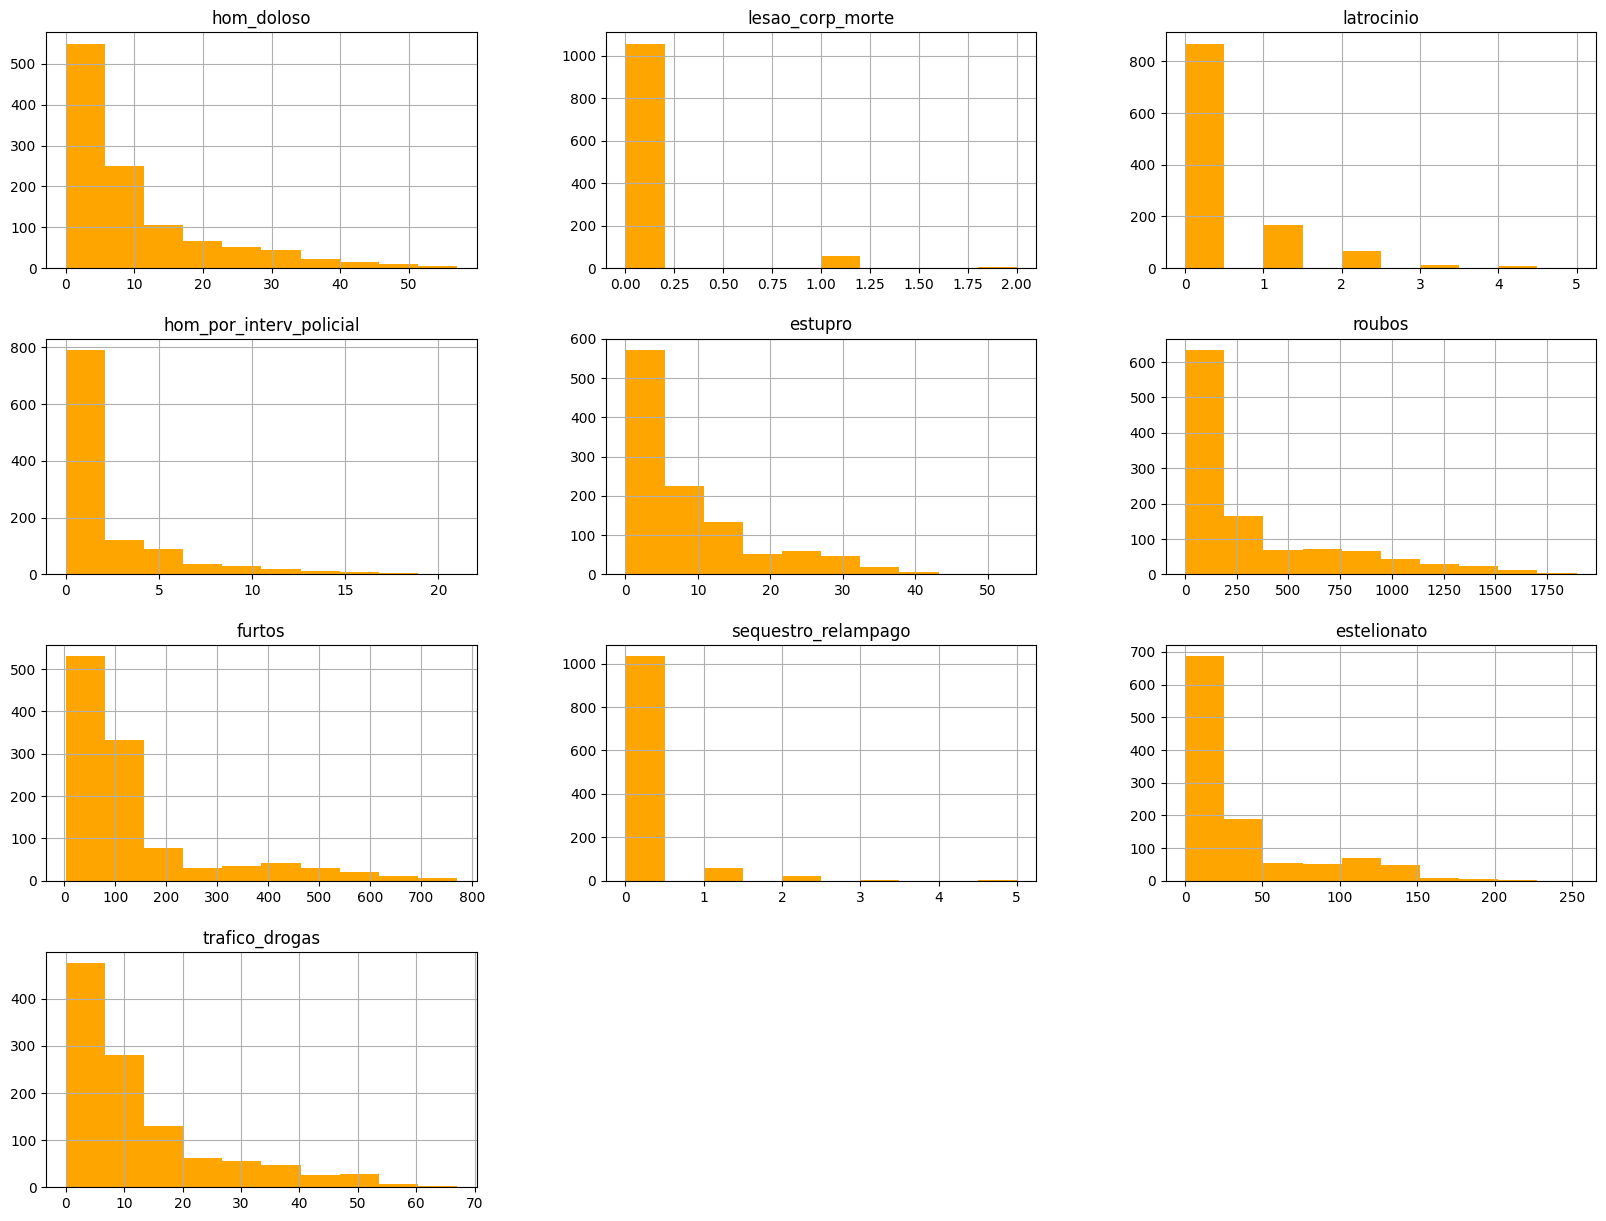

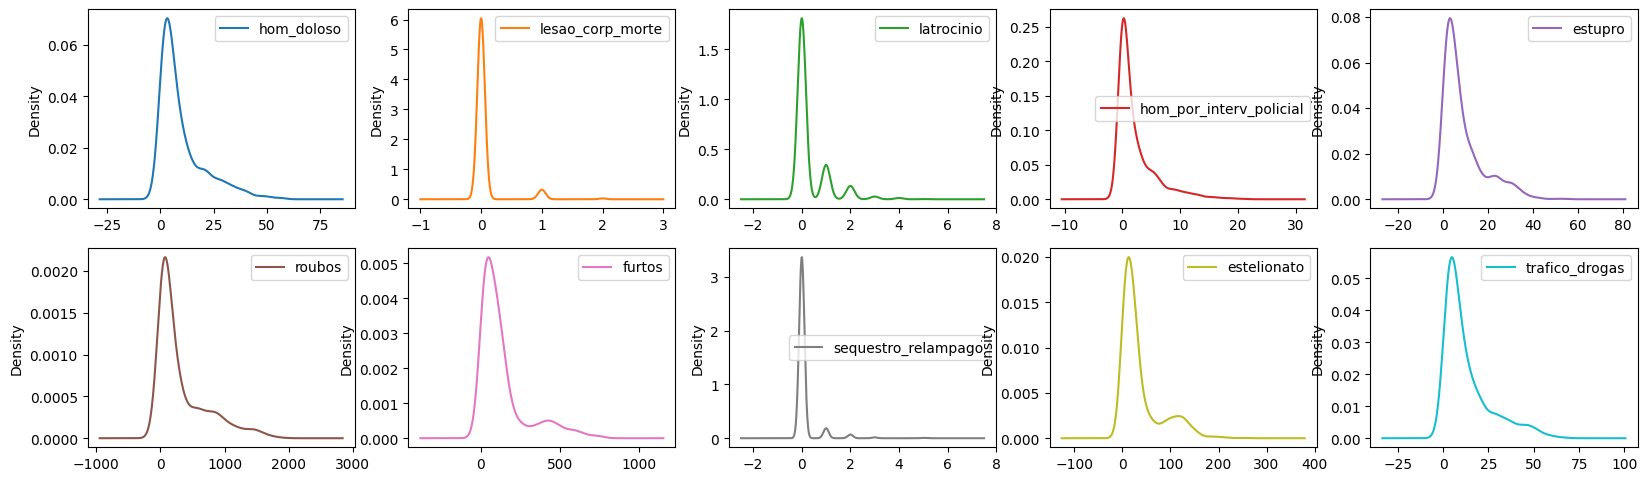

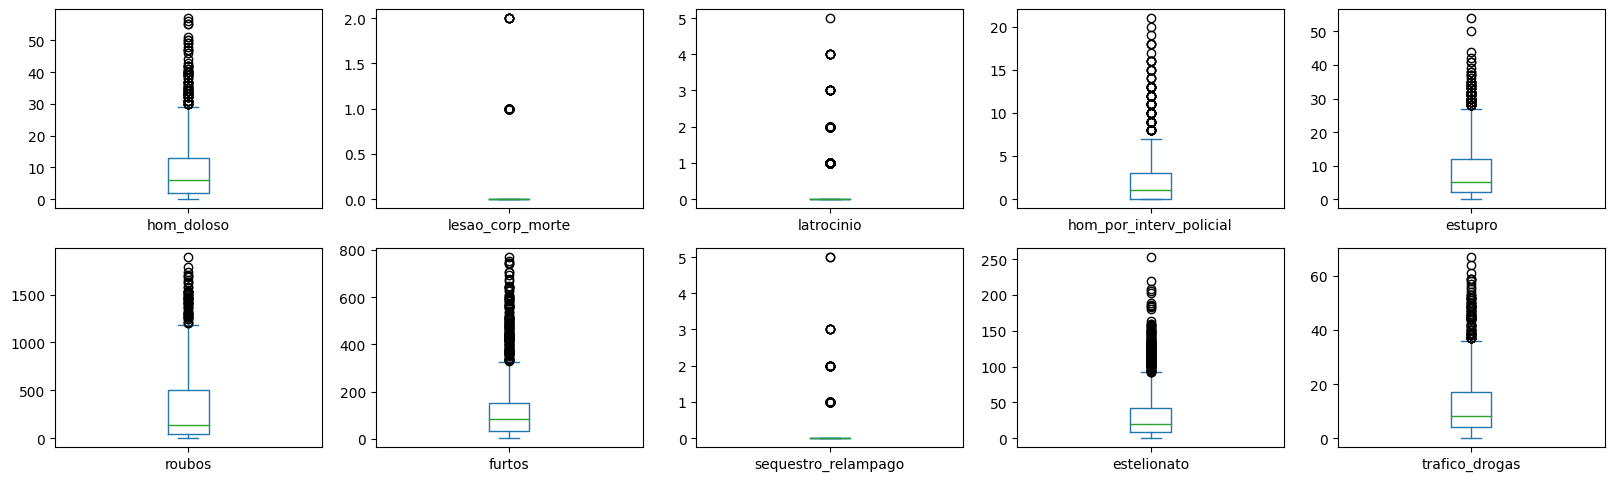

In [73]:
#g13clone=g11.iloc[:,4:]
#g13clone.head(10)
agrupamento_baixada.hist(figsize = (20,15),color="orange")
agrupamento_baixada.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))
agrupamento_baixada.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))

plt.show()

## Análise por Grande Niteroi

In [75]:
agrupamento_niteroi=g1.get_group('Grande Niterói')
agrupamento_niteroi.describe(percentiles=[.05,.25,.75,.95,.99])

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,12.806202,0.100775,0.658915,5.658915,12.635659,693.922481,383.360465,0.372093,91.662791,33.391473
std,11.070399,0.326399,1.043759,6.603850,8.045530,644.855682,216.511513,0.873917,55.562061,27.428823
min,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,57.000000,0.000000,9.000000,1.000000
5%,2.000000,0.000000,0.000000,0.000000,2.000000,49.000000,81.850000,0.000000,13.850000,4.000000
25%,4.000000,0.000000,0.000000,0.000000,6.000000,89.000000,127.000000,0.000000,25.000000,9.000000
50%,8.000000,0.000000,0.000000,3.500000,12.000000,554.000000,462.500000,0.000000,110.000000,30.000000
75%,22.000000,0.000000,1.000000,8.000000,18.000000,1043.500000,558.000000,0.000000,133.000000,44.000000
95%,35.000000,1.000000,3.000000,19.000000,27.000000,1965.650000,669.000000,2.000000,165.300000,89.150000
99%,42.000000,1.000000,4.000000,27.430000,33.430000,2288.160000,737.900000,3.430000,205.290000,113.580000


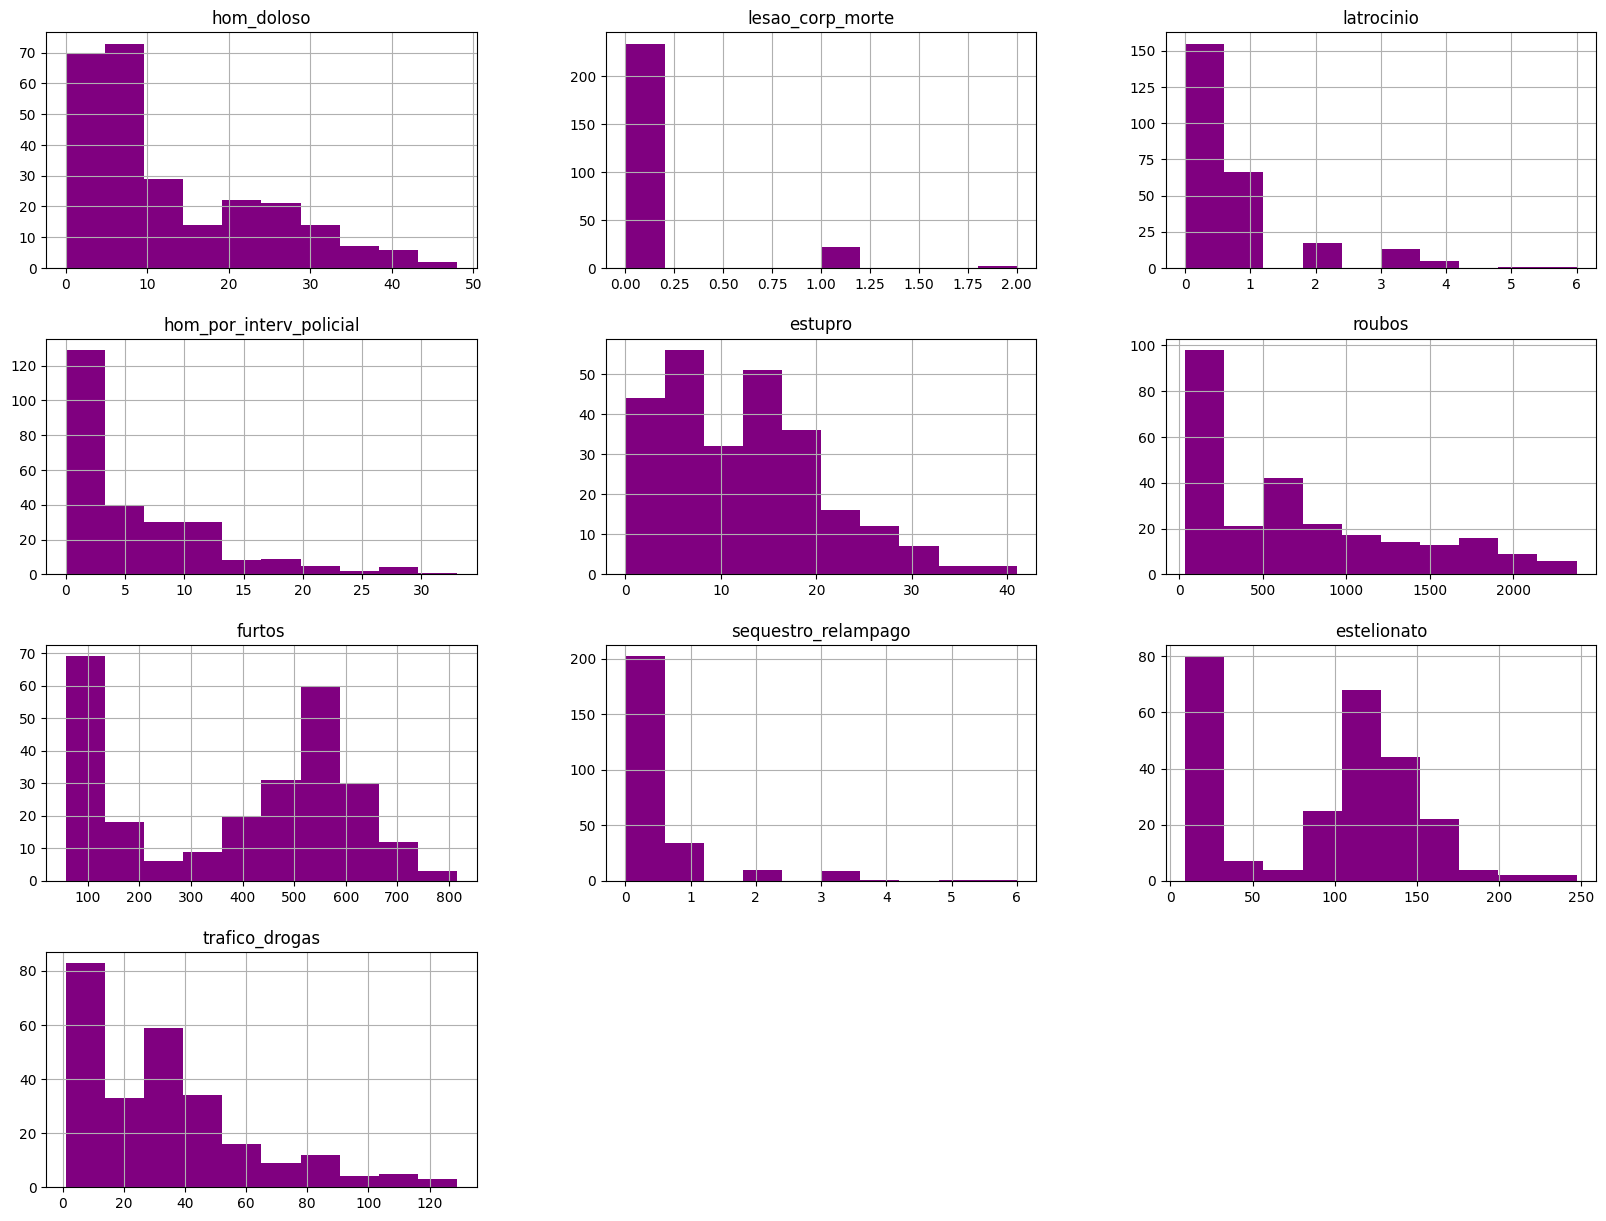

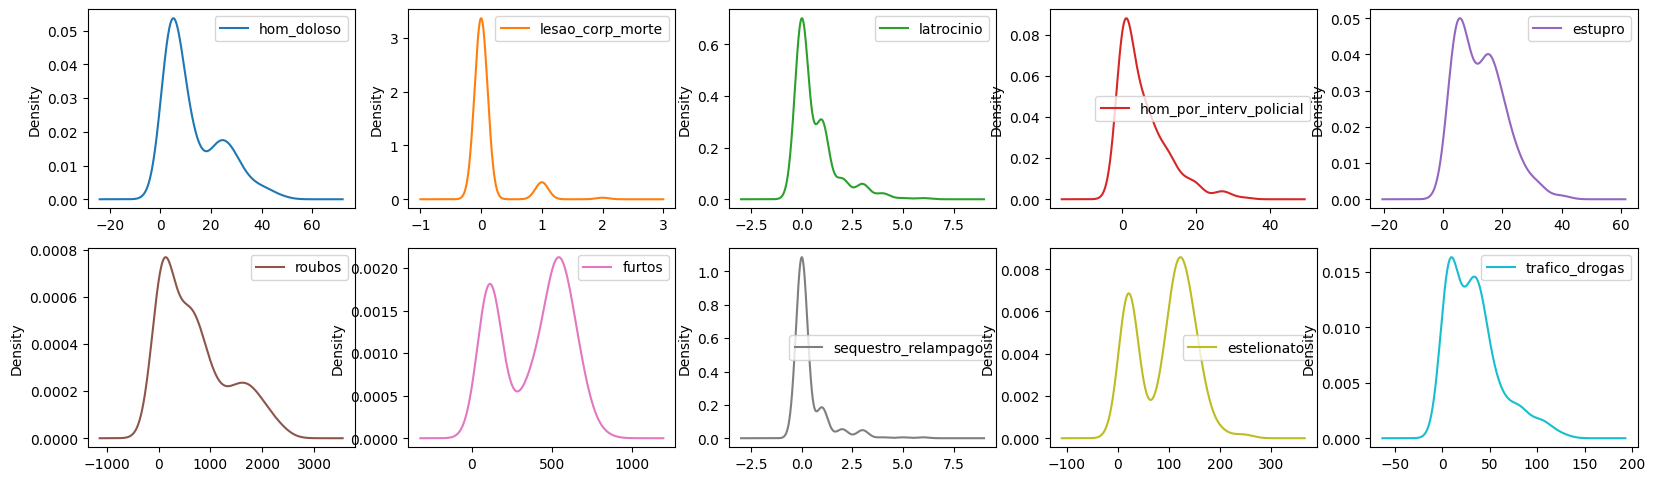

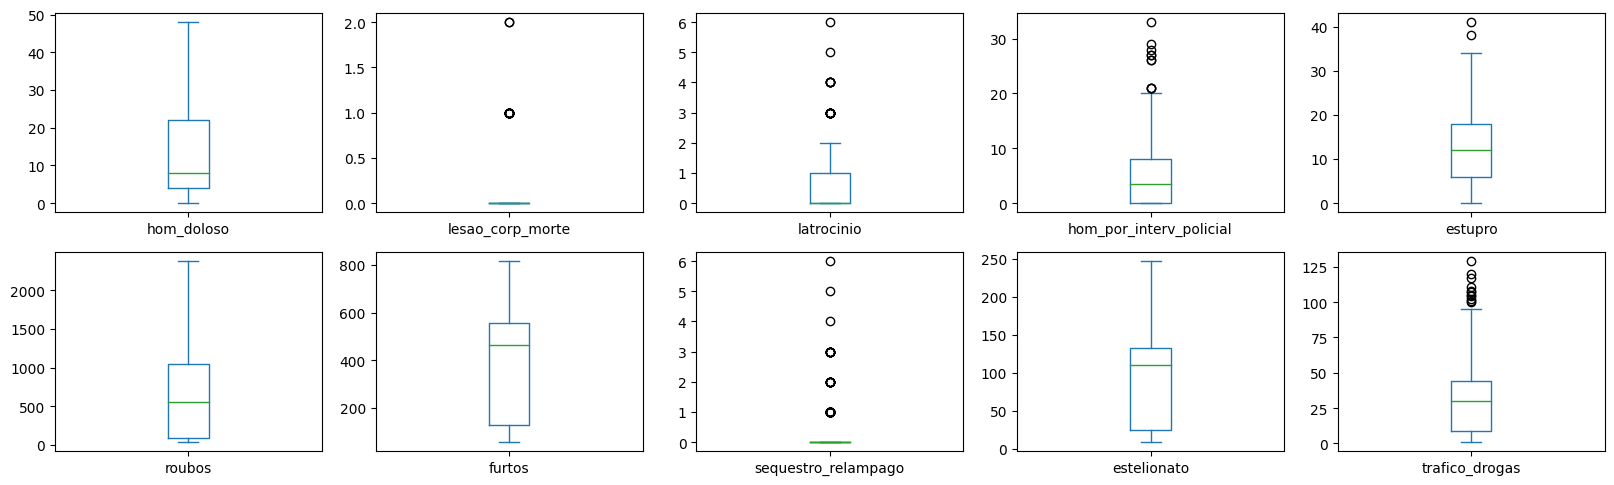

In [76]:
#g14clone=g11.iloc[:,4:]
#g14clone.head(10)
agrupamento_niteroi.hist(figsize = (20,15),color="purple")
agrupamento_niteroi.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))
agrupamento_niteroi.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))

plt.show()

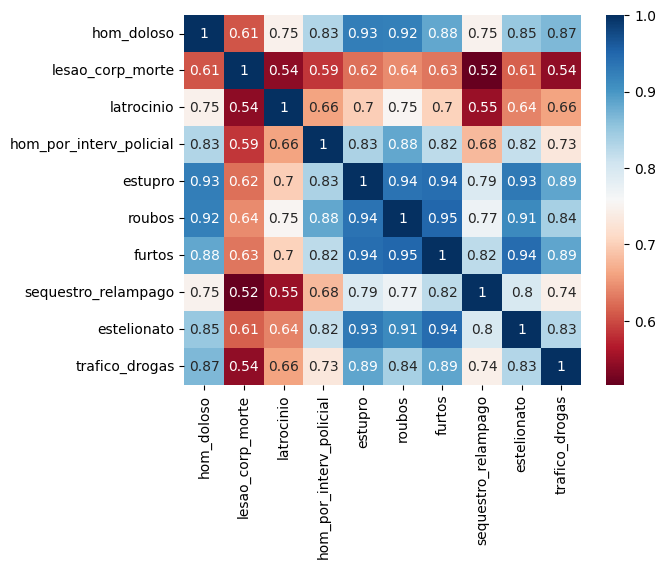

In [59]:
# Matriz de Correlação com Matplotlib Seaborn

sns.heatmap(datasetclone.corr(), annot=True, cmap='RdBu');

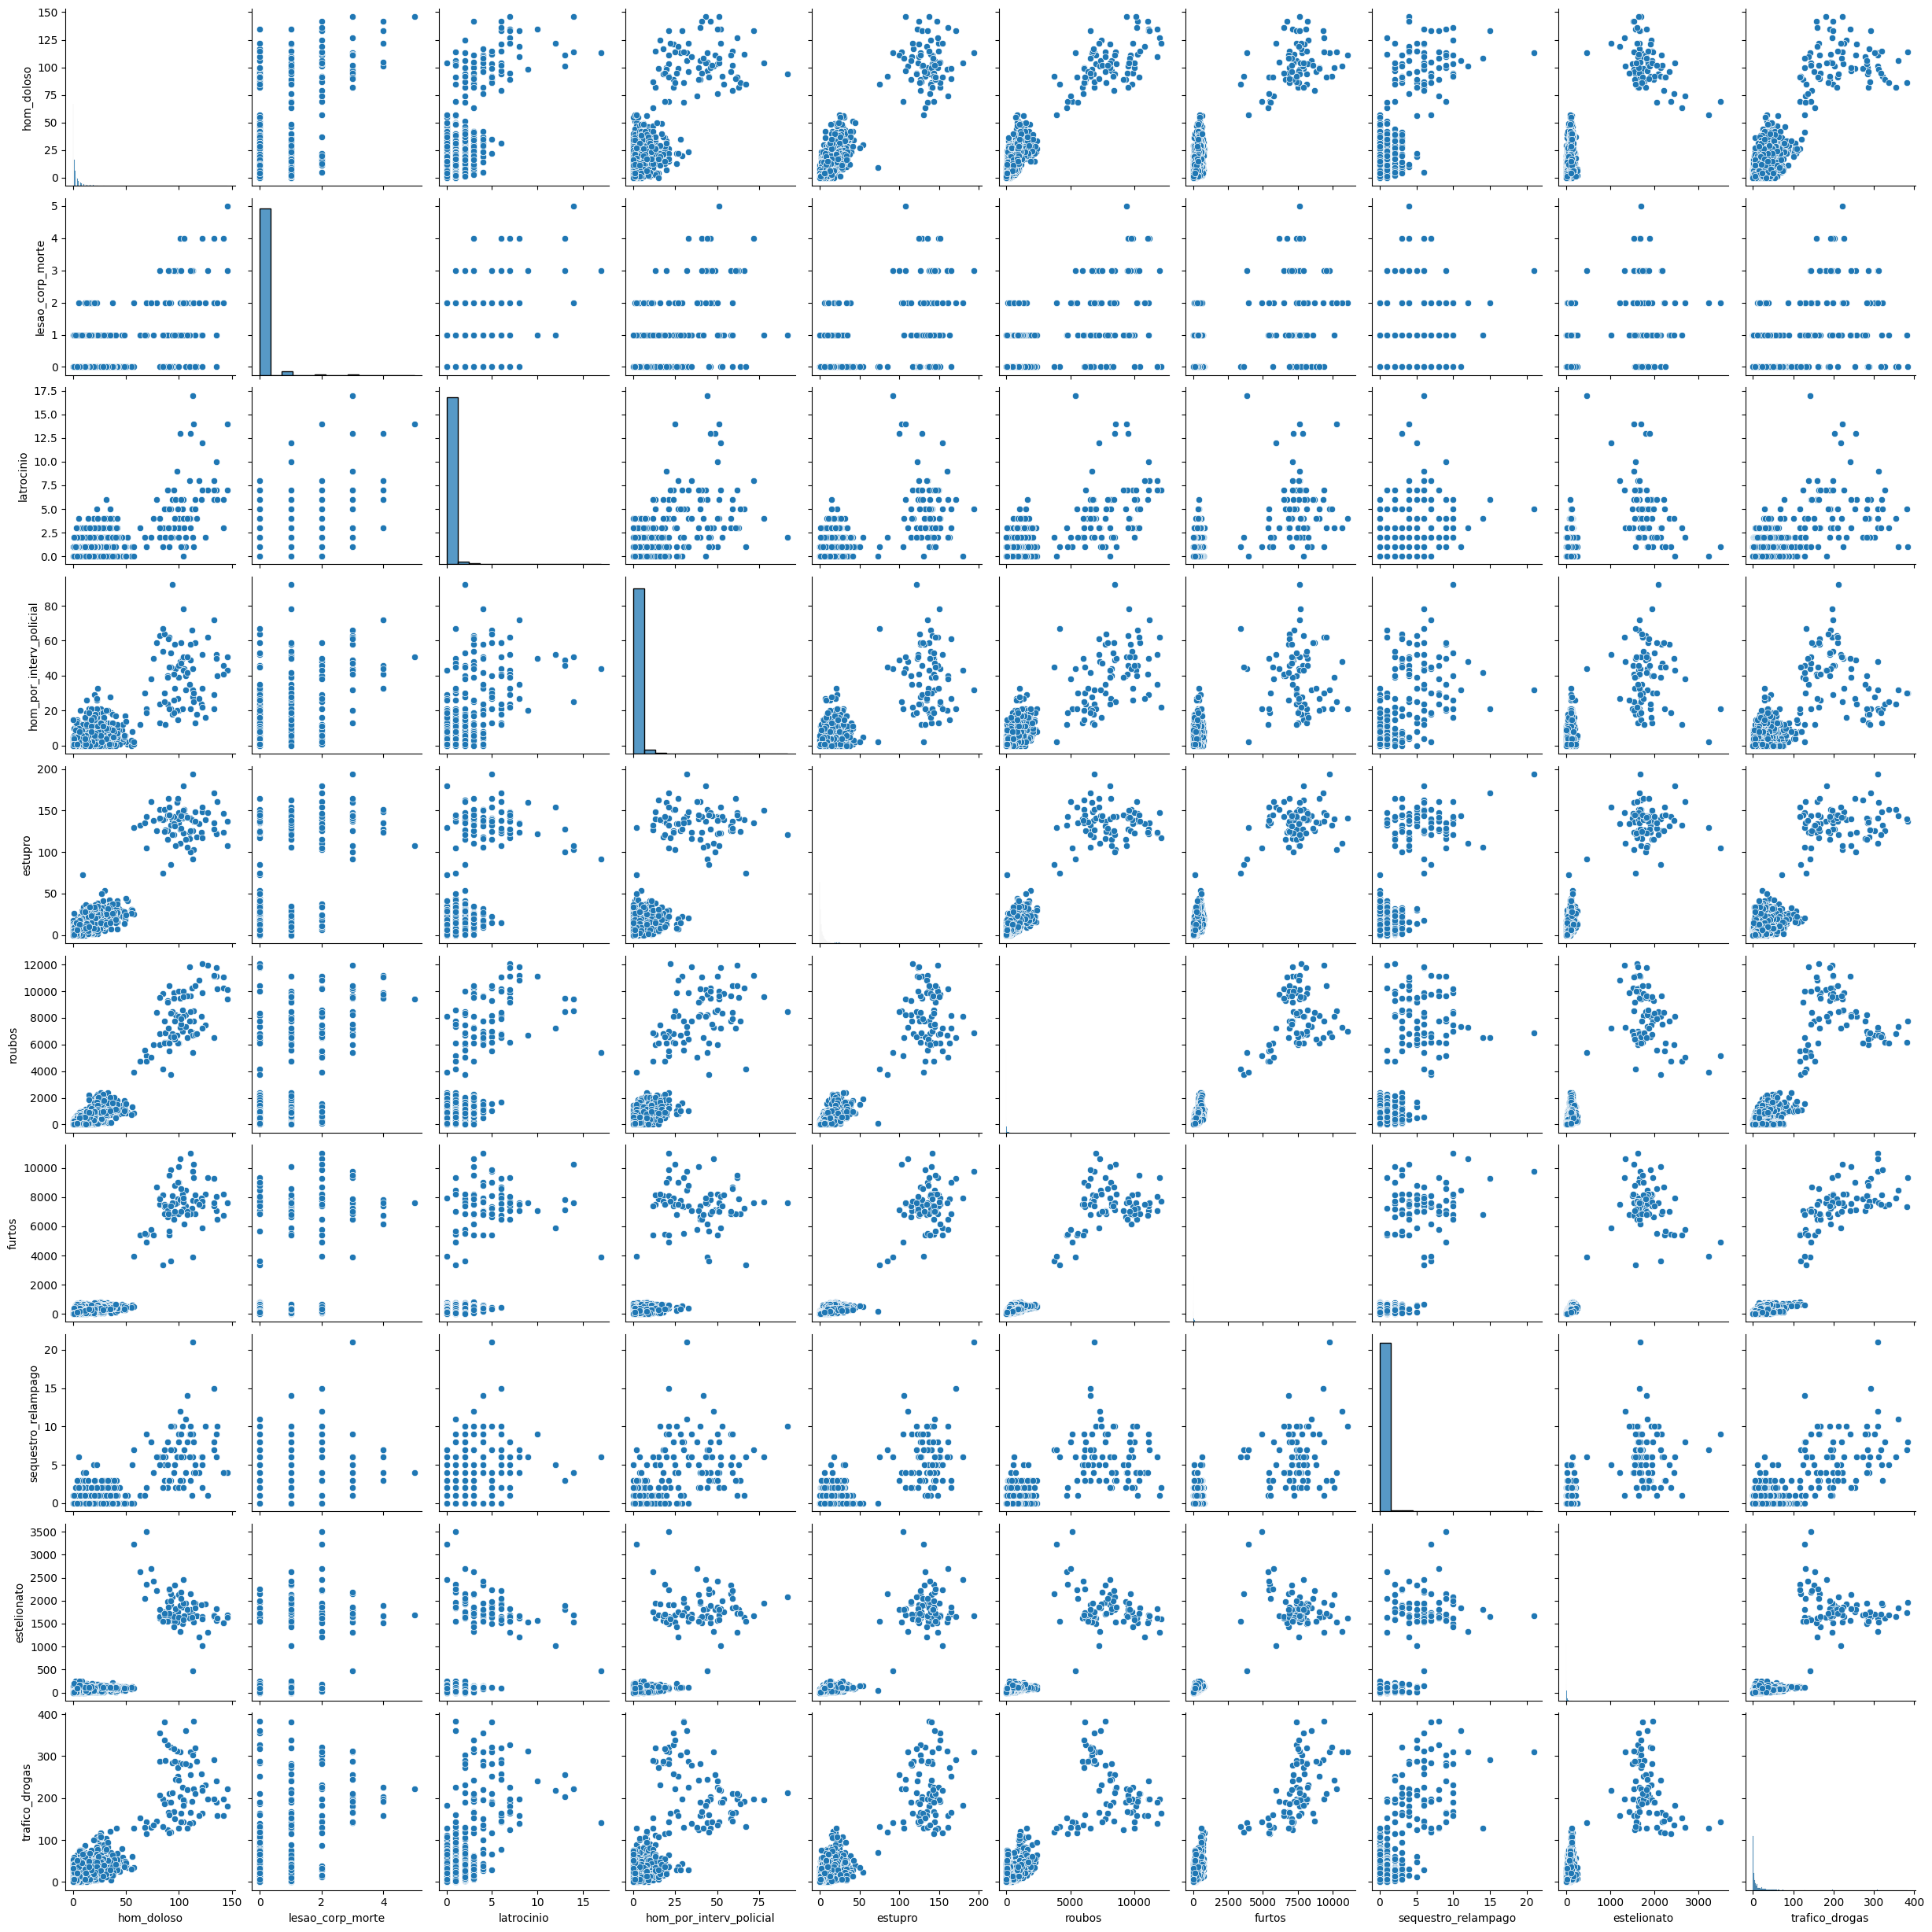

In [48]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(datasetclone)

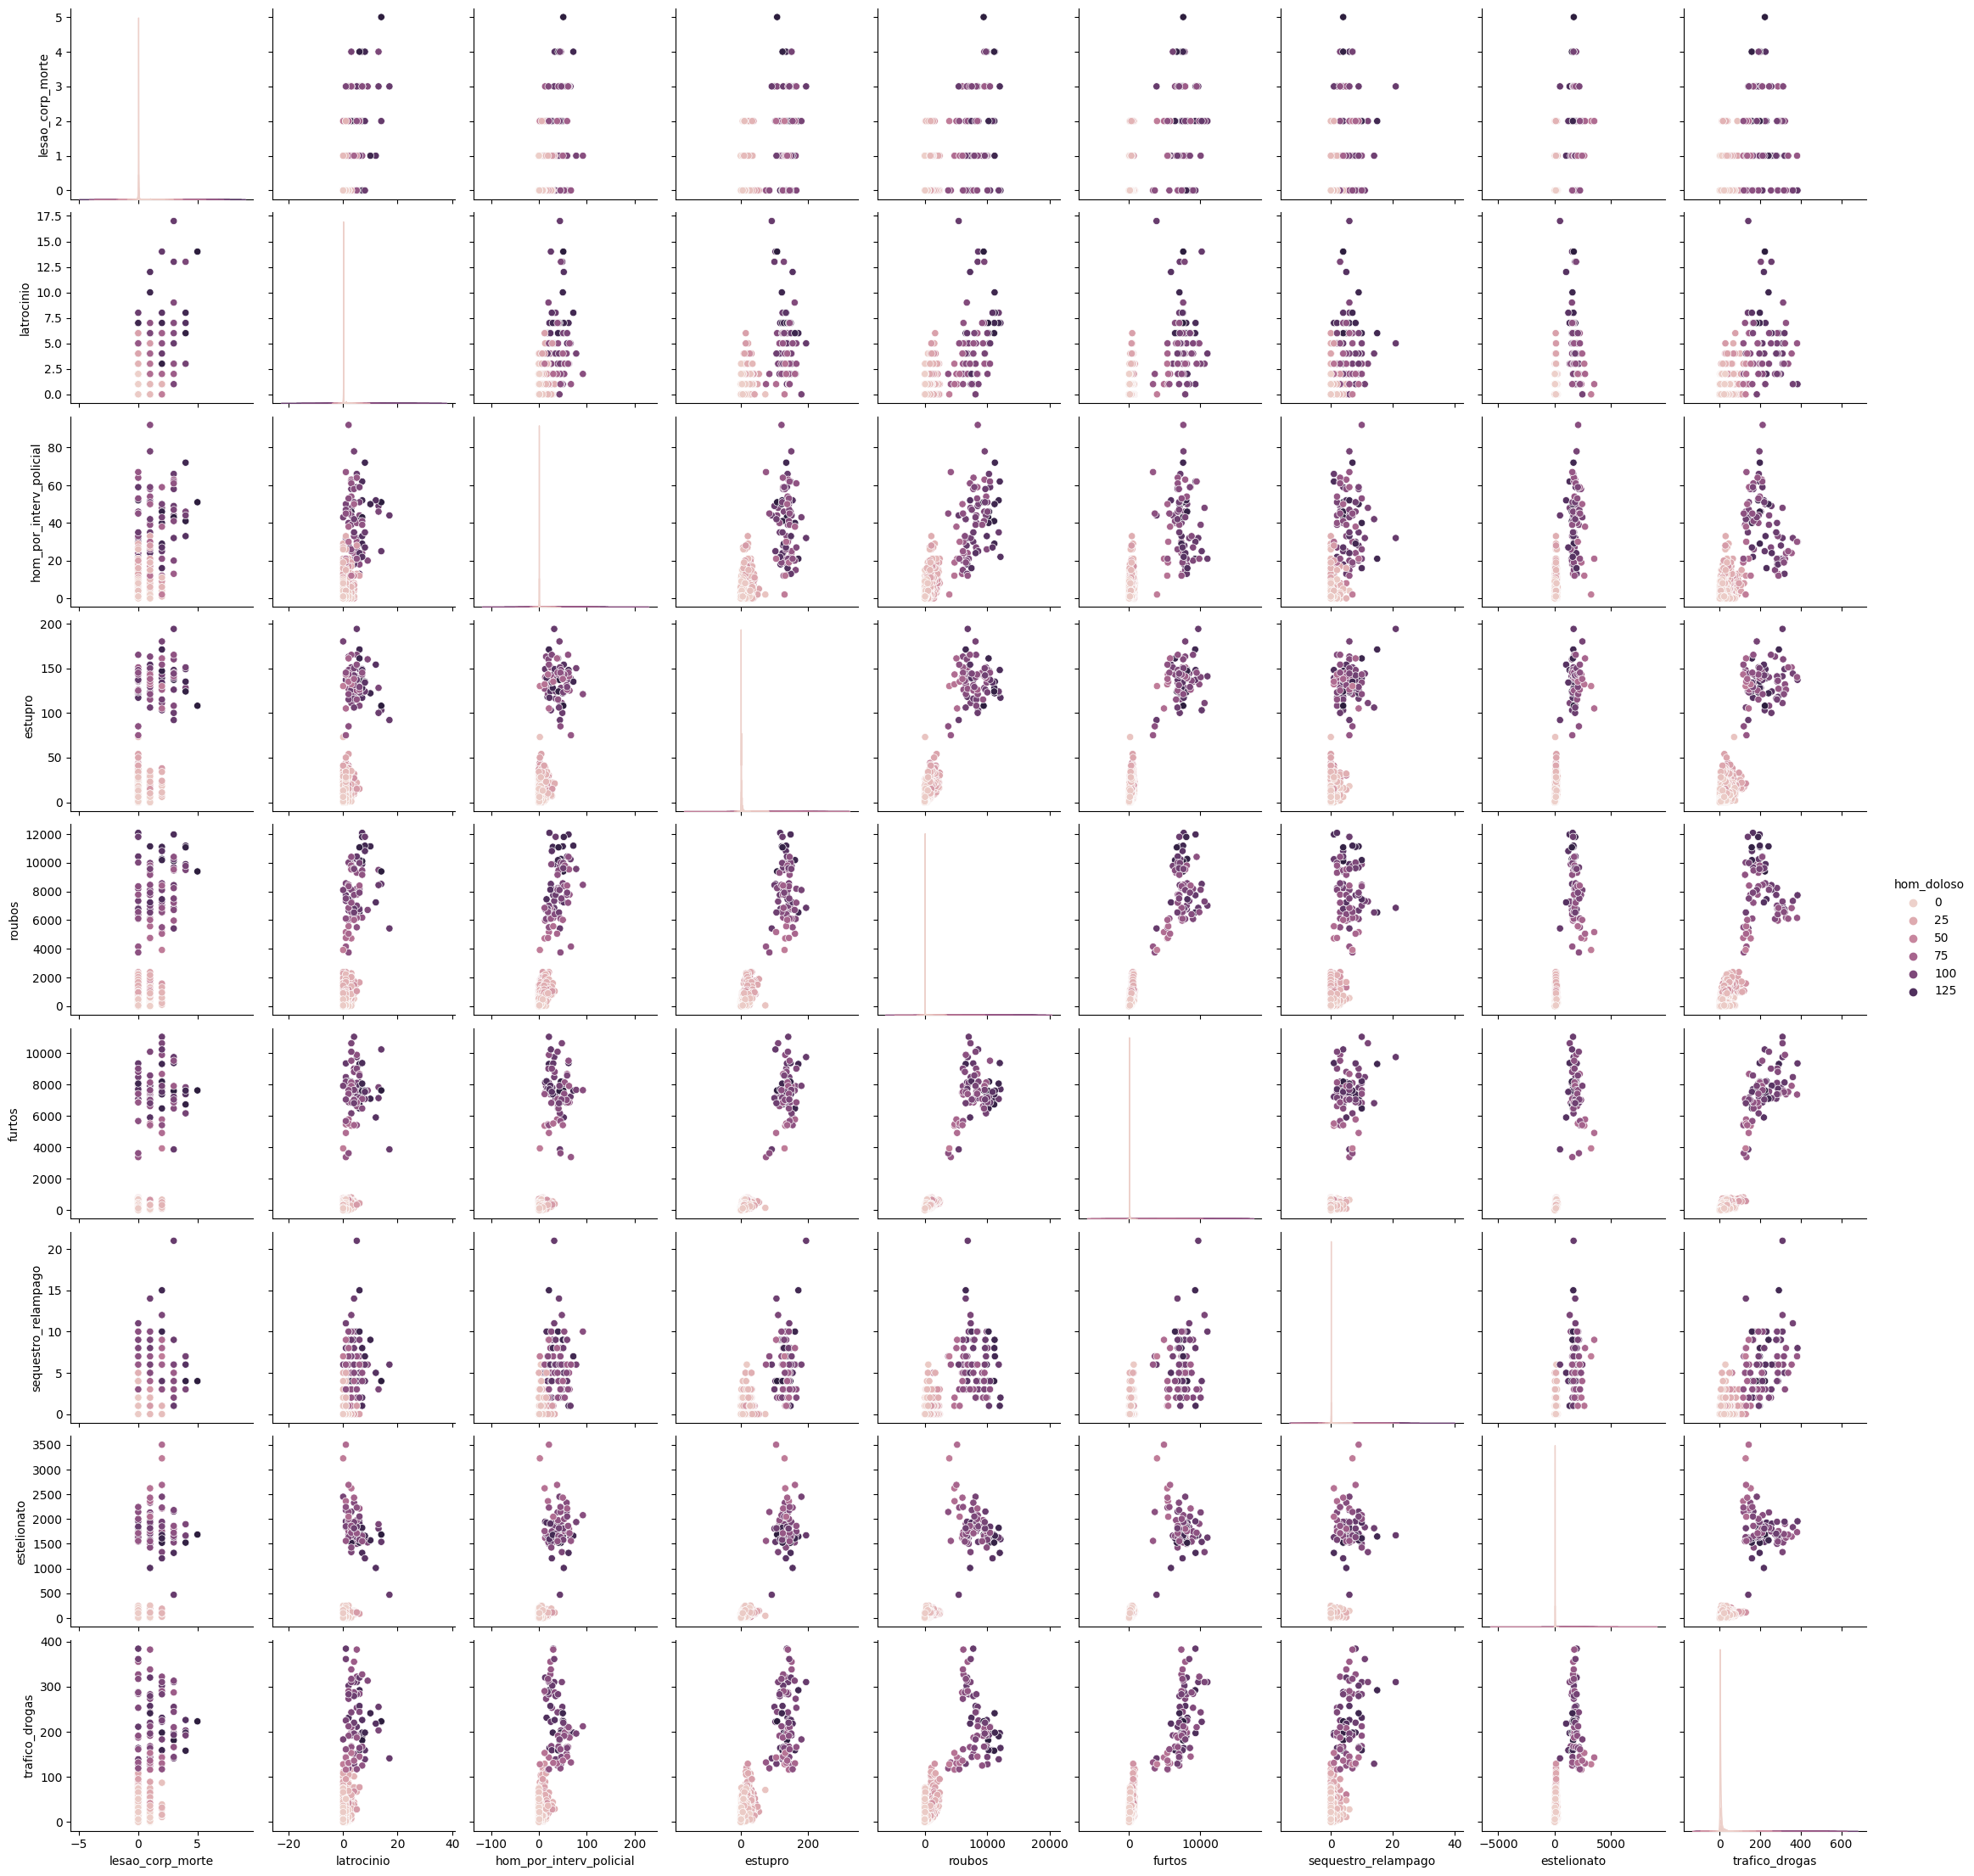

In [49]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(datasetclone, hue = "hom_doloso", height = 2.5);



In [50]:
# verificando nulls no dataset
dataset.isnull().sum()

fmun_cod                   0
fmun                       0
ano                        0
mes                        0
regiao                     0
hom_doloso                 0
lesao_corp_morte           0
latrocinio                 0
hom_por_interv_policial    0
estupro                    0
roubos                     0
furtos                     0
sequestro_relampago        0
estelionato                0
trafico_drogas             0
dtype: int64